## 데이터 전처리

### 수치형
사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수

### 범주형
주야, 요일, 사망자수, 사상자수, 중상자수, 경상자수, 부상신고자수, 발생지시도, 발생지시군구, 
사고유형_대분류, 사고유형_중분류, 법규위반, 도로형태_대분류,
도로형태, 당사자종별_1당_대분류, 당사자종별_2당_대분류

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [69]:
category = ['주야', '요일', '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '법규위반', 
            '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류']

x_train_num = pd.read_csv('./교통사망사고정보/Train_교통사망사고정보(12.1~17.6).csv',encoding='cp949', 
                              usecols=['사상자수', '사망자수', '중상자수', '경상자수','부상신고자수'])

x_train_cat = pd.read_csv('./교통사망사고정보/Train_교통사망사고정보(12.1~17.6).csv',encoding='cp949',
                               usecols=['주야', '요일', '사망자수', '사상자수', '중상자수', '경상자수', '부상신고자수', 
                                        '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '법규위반', 
                                        '도로형태_대분류', '도로형태', '당사자종별_1당_대분류', '당사자종별_2당_대분류'])


In [70]:
x_train_cat['당사자종별_2당_대분류'] = x_train_cat['당사자종별_2당_대분류'].replace(['0', np.nan], '없음')
# print(x_train_cat['당사자종별_2당_대분류'][1878])
# print(x_train_cat['당사자종별_2당_대분류'][7360])

In [71]:
encoder = LabelEncoder()

for col in category:
    print(col)
    encoder.fit(x_train_cat[col].astype(str).unique())
    print(x_train_cat[col].astype(str).values)
    x_train_cat[col] = encoder.transform(x_train_cat[col].astype(str).values)
    

주야
['야간' '야간' '야간' ... '야간' '야간' '야간']
요일
['금' '금' '금' ... '일' '일' '일']
발생지시도
['경기' '전남' '충남' ... '서울' '전북' '서울']
발생지시군구
['성남시' '곡성군' '서산시' ... '서초구' '정읍시' '은평구']
사고유형_대분류
['차대사람' '차대차' '차대사람' ... '차대사람' '차대차' '차대사람']
사고유형_중분류
['횡단중' '추돌' '차도통행중' ... '횡단중' '정면충돌' '차도통행중']
법규위반
['안전운전 의무 불이행' '안전운전 의무 불이행' '안전운전 의무 불이행' ... '안전운전 의무 불이행' '중앙선 침범'
 '안전운전 의무 불이행']
도로형태_대분류
['단일로' '단일로' '단일로' ... '교차로' '단일로' '단일로']
도로형태
['기타단일로' '기타단일로' '기타단일로' ... '교차로부근' '기타단일로' '기타단일로']
당사자종별_1당_대분류
['승용차' '승용차' '승용차' ... '승용차' '승용차' '승용차']
당사자종별_2당_대분류
['보행자' '승용차' '보행자' ... '보행자' '승용차' '보행자']


In [72]:
x_train_cat

,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류
0,0,0,1,1,0,0,0,1,93,1,17,10,5,8,5,2
1,0,0,1,4,2,1,0,12,19,2,14,10,5,8,5,5
2,0,0,1,1,0,0,0,15,90,1,13,10,5,8,5,2
3,0,0,1,1,0,0,0,5,87,2,16,10,2,4,5,10
4,1,0,1,2,1,0,0,8,128,2,16,14,5,2,8,13
5,1,0,1,1,0,0,0,4,87,2,16,9,5,8,8,5
6,1,0,1,3,2,0,0,5,54,2,16,1,2,3,5,13
7,1,0,1,1,0,0,0,1,142,1,17,8,5,8,11,2
8,1,0,1,1,0,0,0,15,90,2,16,10,5,8,11,10
9,0,0,1,2,0,1,0,12,25,2,2,10,5,8,11,5


In [61]:
# x_val_cat = x_train_cat[:5000]
# x_train_cat =  x_train_cat[5000:]

# x_val_num = x_train_num[:5000]
# x_train_num = x_train_num[5000:]

In [73]:
x_train_num

,사망자수,사상자수,중상자수,경상자수,부상신고자수
0,1,1,0,0,0
1,1,4,2,1,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,2,1,0,0
5,1,1,0,0,0
6,1,3,2,0,0
7,1,1,0,0,0
8,1,1,0,0,0
9,1,2,0,1,0


In [74]:
y_train_num = x_train_num[['사망자수','사상자수']]
# y_val_num = x_val_num[['사망자수','사상자수']]

In [75]:
x_train_num = x_train_num[['중상자수','경상자수','부상신고자수']]
# x_val_num = x_val_num[['중상자수','경상자수','부상신고자수']]

In [76]:
# array 형태로 받기
y_train_num = y_train_num.values
# y_val_num = y_val_num.values
x_train_num = x_train_num.values
# x_val_num = x_val_num.values
x_train_cat = x_train_cat.values

# Deep Learning

In [77]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [78]:
print(x_train_cat.shape)
print(x_train_num.shape)
print(y_train_num.shape)

(25037, 16)
(25037, 3)
(25037, 2)


## Define Model

In [79]:
model = Sequential()

model.add(Dense(300, input_dim=3, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(2))

In [80]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [90]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000001)

callbacks = [
    learning_rate_reduction, # learning_rate를 점차 감소시킴으로서 최적값에 접근하는 방식
                                        # approach to get optimal value by gradually decreasing learning_rate
    EarlyStopping('val_loss', patience=3), # val_loss이 최적값에서 멀어지는 순간 epoch가 남아도 학습 중지
                                                            # If val_loss deviates from the optimal value, 
                                                            # learning stops even if epoch remains.
    ModelCheckpoint('model.h5', save_best_only=True)] # 모델을 학습시키면서 지금까지 등장했던 최적의 weight들을 항상 저장한다.


hist = model.fit(x_train_num, y_train_num, epochs=50, batch_size=64, callbacks=callbacks, validation_split=0.1,)

Train on 22533 samples, validate on 2504 samples
Epoch 1/50
22533/22533 [==============================] - 1s 32us/step - loss: 0.0635 - acc: 0.6185 - val_loss: 0.0757 - val_acc: 0.2716
Epoch 2/50
22533/22533 [==============================] - 1s 32us/step - loss: 0.0644 - acc: 0.5955 - val_loss: 0.0636 - val_acc: 0.2716
Epoch 3/50
22533/22533 [==============================] - 1s 31us/step - loss: 0.0634 - acc: 0.6468 - val_loss: 0.0663 - val_acc: 0.2716

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 4/50
22533/22533 [==============================] - 1s 31us/step - loss: 0.0617 - acc: 0.6051 - val_loss: 0.0633 - val_acc: 1.0000
Epoch 5/50
22533/22533 [==============================] - 1s 31us/step - loss: 0.0624 - acc: 0.6273 - val_loss: 0.0656 - val_acc: 0.2716
Epoch 6/50
22533/22533 [==============================] - 1s 32us/step - loss: 0.0619 - acc: 0.5837 - val_loss: 0.0620 - val_acc: 1.0000

Epoch 00006: ReduceLROnPlateau reducing learnin

In [91]:
loss_and_metrics = model.evaluate(x_train_num, y_train_num, batch_size=32)
print(loss_and_metrics[0])
print(loss_and_metrics[1] * 100)

25037/25037 [==============================] - 1s 22us/step
0.061015738825635026
100.0


In [96]:
Xnew = np.array([[4, 1, 0]])
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[4 1 0], Predicted=[1.2350948 6.1613626]


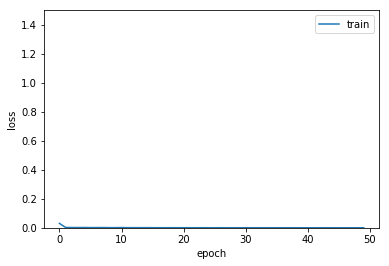

In [574]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()